In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sklearn 
sns.set_style('whitegrid')

# Introduction to Sckit-Learn

There are multiple open source Python Libraries that provide a platform for implementing Machine Learning Algorithms in a streamlined manner. 

In this walkthrough here, we'll learn the basic structure of the elements in it's API. A solid understanding of this gives us a control over our applications.

## Data Representation in Scikit-Learn

Machine Learning is about training a machine to replicate real world data.
The basics of learning Machine Learning starts from learning how data can be represented. The most fundamental way this can be done is from a table.

A table is simply a two-dimensional grid filled with elements. The row's representing individual Data Points and the columns representing features (by-and-large)

Let's look at the Iris dataset first.

In [3]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row is usually called *sample* with number of samples usually represented as `n_samples` and a column is called *feature* and represented as `n_features`.

### The Features Matrix

The table we'll study above is usually called a Feature Matrix and is often store in the variable `X`, by convention. The Feature Matrix is usually a NumPy `Array` or a Pandas `DataFrame`.

### The Target Array

In addition to the Feature Matrix, we work with another structure called the Target Array, usually called `Y`. This Array is usually a 1 dimensional Array with length `n_samples`. `Y` can either be a NumPy Array or a Pandas Dataframe, it's samples can either contain continuous values or a set number of discrete values. Although we'll not be dealing with such problems but, some scikit learn algorithms can be trained on multidimensional target variable which can have, say, dimension, `[n_targets_1, n_targets_2]`

A common point of confusion is identifying the Target Array in the given problem/larger tabular structure. This is usually what we want to train the model into predicting, the dependant variable, the output we want to mimic. 

In the above case, the Target Array would be '`Species`'

With the Target Array in mind, let's visualize the data using seaborn.

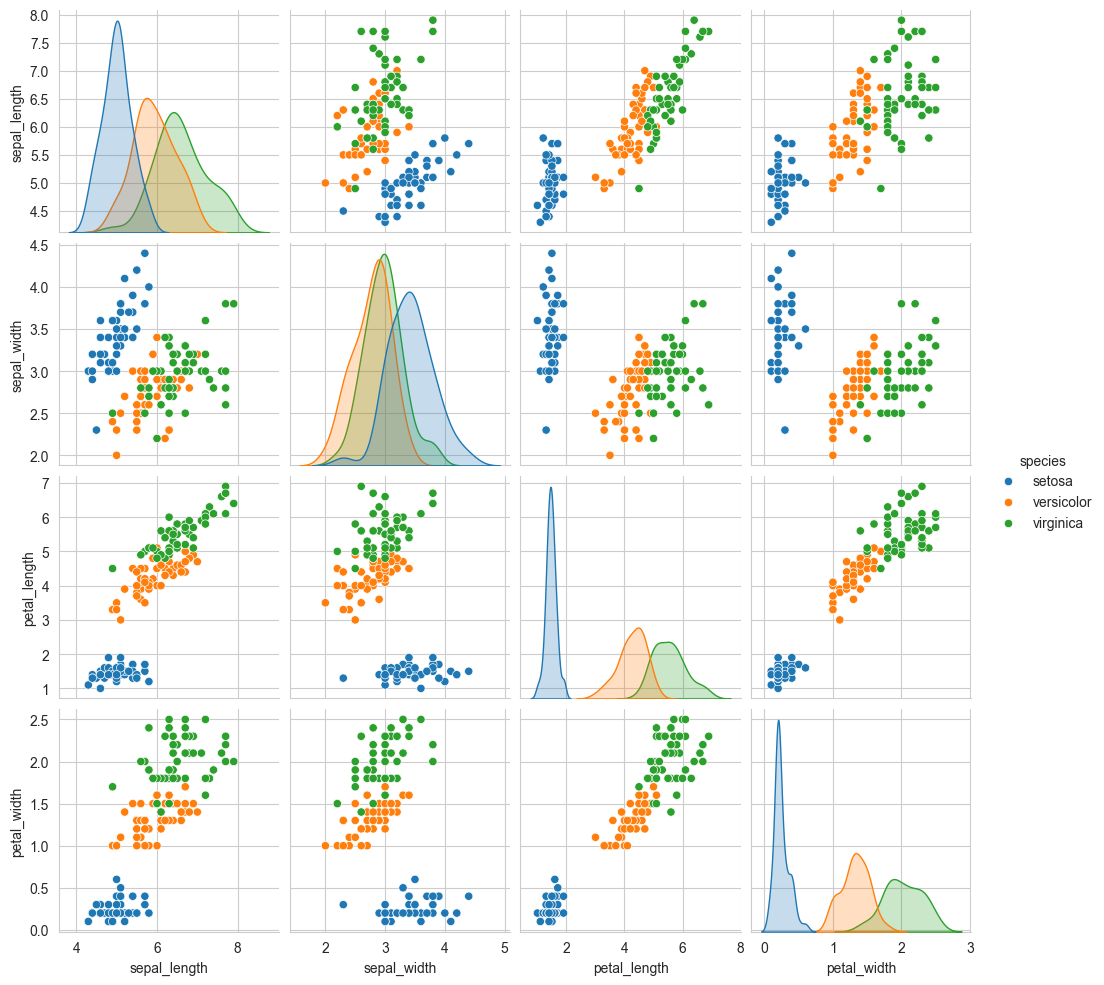

In [4]:
sns.pairplot(iris,hue='species')
# iris

For use in Scikit-Learn, we'll extract the feature matrix and the target array from the DataFrame.

In [5]:
X_iris=iris.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y_iris=iris.iloc[:,-1]
X_iris.shape,Y_iris.shape,type(X_iris),type(Y_iris)


((150, 4), (150,), pandas.core.frame.DataFrame, pandas.core.series.Series)

The Target and the Feature Arrays can be visualized as follows.

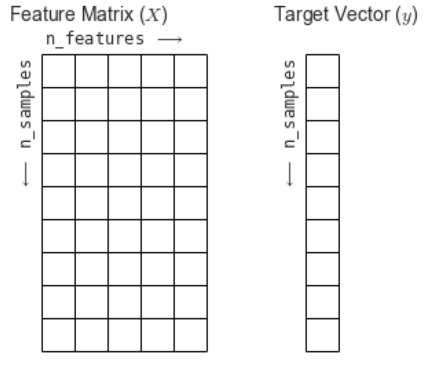

## Scikit-Learn's Estimator API

As outlined in the [Scikit-Learn's API paper](http://arxiv.org/abs/1309.0238), this is what has been kept in mind

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas `DataFrame` objects, SciPy sparse matrices) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

Every Machine Learning Algorithm has been implemented via this basic Estimator API, Which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

The most common steps of using this API are as follows. 

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector, as outlined earlier in this chapter.
4. Fit the model to your data by calling the `fit` method of the model instance.
5. Apply the model to new data:
   - For supervised learning, often we predict labels for unknown data using the `predict` method.
   - For unsupervised learning, we often transform or infer properties of the data using the `transform` or `predict` method.


Now let's jump right into the application.

### Simple Linear Regression

To demonstrate this API, let's consider the simple case of finding a line that fits perfectly with a collection of (x,y) type of data. 

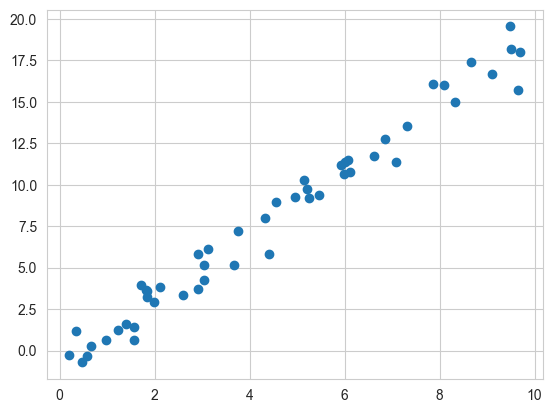

In [6]:
rng=np.random.RandomState(42)
x=10*rng.rand(50)
y=2*x-1+rng.randn(50)
plt.scatter(x,y)

With this data in mind, let's fit a model to this data.

#### 1. Choose a suitable class of model

In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple LinearRegression model, we can import the linear regression class:

In [7]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters

After choosing the model class, we need to fine tune the parameters of the model we'll use to fit the data on. For this particular instance we'll need to ask ourselves these questions to select an appropriate set of parameters.

- Would we like to fit a line with a y intercept?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

For this particular example we can use an instance of the `LinearRegression` class and specify that we would like to fit the intercept using the `fit_intercept` hyperparameter.


In [8]:
model=LinearRegression(fit_intercept=True)
model

LinearRegression()

It should be very clear at this stage that what we have now defined is a model that, now has to be fit to the data. The Scikit-Learn API makes very clear the distinction between choice of model and application of model to data.

#### 3. Arrange the data into a features matrix and target vector

Previously we saw how the feature matrix needs to be a 2D array and the Target matrix needs to be a one dimensional array. The Target Matrix that we've designed is already a one dimensional array but the feature matrix needs to be converted into a 2 dimensional one who's dimensions look like `[n_samples,n_features]`. Thus the following step helps.

In [9]:
X=x[:,np.newaxis]
X.shape

(50, 1)

#### 4. Fitting the model to the data

Now it's time to fit the model to the data. This is done using the `fit` method.

In [10]:
model.fit(X,y)

LinearRegression()

This `fit` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the `fit` process have trailing underscores; for example in this linear model, we have the following:

In [11]:
model.coef_ , model.intercept_

(array([1.9776566]), -0.903310725531111)

These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing the results to the data definition, we see that they are close to the values used to generate the data: a slope of 2 and intercept of –1.

One problem while solving such machine learning problems is determining the perfect set of model parameters. This is more of a statistical modeling question than a machine learning question.

#### Predicting the labels of the unknown data

Once the model is trained, the main task is to now use this model to make predictions or applying it to unknown data. This can be done by the `predict` method. 

In this particular example, our model will now predict the new y values for a certain set of x-values.

In [12]:
xfit=np.linspace(-1,11)
Xfit=xfit[:,np.newaxis]

In [13]:
yfit=model.predict(Xfit)

Now that we've fit `Xfit` to the given data. Let's plot this on the same plot as training data and see how good of a fit we have with us.

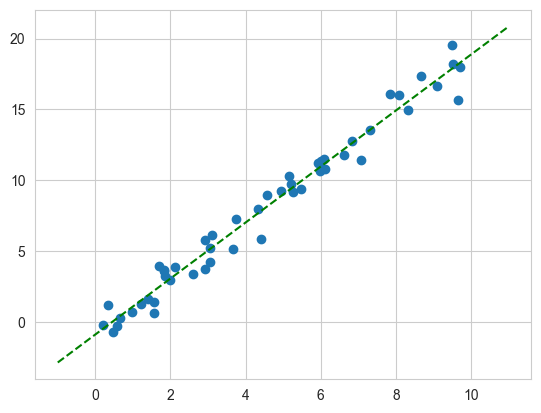

In [14]:
plt.scatter(x,y)
plt.plot(xfit,yfit,'g--')

Pretty good fit. This fit is usually compared with a known, set, baseline.

### Supervised Learning Example: Iris Classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use a simple generative model known as *Gaussian naive Bayes*, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution.
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the `train_test_split` utility function:

In [15]:
from sklearn.model_selection import train_test_split 

Xtrain, Xtest, ytrain, ytest=train_test_split(
    X_iris,
    Y_iris,
    random_state=1
)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((112, 4), (38, 4), (112,), (38,))

Now that the Data is arranged, we can follow our procedure.

In [16]:
from sklearn.naive_bayes import GaussianNB # Choosing Model Class
model=GaussianNB() # Setting hyperparameters
model.fit(Xtrain,ytrain)
yfit=model.predict(Xtest)
yfit

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [17]:
pd.DataFrame({'Predicted':yfit,'True':ytest})

,Predicted,True
14,setosa,setosa
98,versicolor,versicolor
75,versicolor,versicolor
16,setosa,setosa
131,virginica,virginica
56,versicolor,versicolor
141,virginica,virginica
44,setosa,setosa
29,setosa,setosa
120,virginica,virginica


Now, we can use the `accuracy_score` utility to see the accuracyof the predicted labels.

In [18]:
from sklearn.metrics import accuracy_score,precision_score
accuracy_score(ytest,yfit)

0.9736842105263158

### Unsupervised Learning Example: Iris Dimensionality Reduction

Let's try to reduce the dimensions of the Iris Dataset without loss in the nature or any important character of the dataset.

The iris dataset has four dimensions in it's feature space. If we're able to reduce the data to less than three dimensions, it'll be easier for us to visualize the whole of the dataset and directly derive inferences from the visualization.

Here we'll use the Princpal Component Analysis which is a fast linear dimensionality reduction technique. We'll ask the model to compress the data within two dimensions so that it's easier for us to plot it in 2 dimensions.

Let's follow the code written below.

In [19]:
from sklearn.decomposition import PCA #Choosing the model class
model=PCA(n_components=2) #Instantiating the model

model.fit(X_iris)

PCA(n_components=2)

In [20]:
X_iris_2D=model.transform(X_iris)
X_iris_2D

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

Now let's plot the results.

A quick way to do this is to append the two new features to the original dataset and use `lmplot` to plot the result.

In [21]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


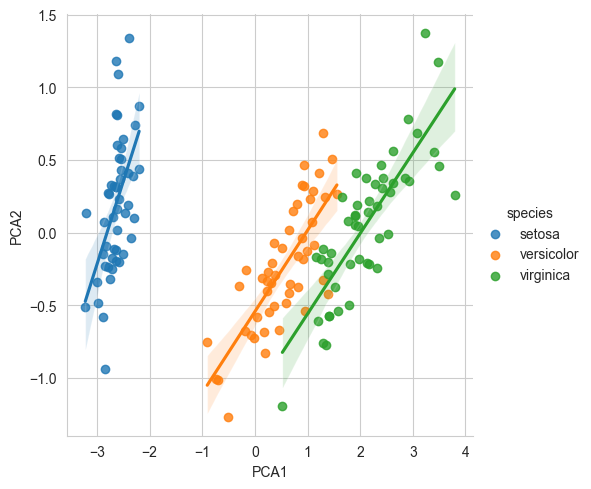

In [22]:
iris['PCA1']=X_iris_2D[:,0]
iris['PCA2']=X_iris_2D[:,1]
sns.lmplot(data=iris,x='PCA1',y='PCA2',hue='species')

We can clearly see how the three regions are well separated. Notice how we didn't let the training algorithm know anything about the labels of each data point. this suggests that a relatively straightforward classification would be effective on the dataset, as we saw before.

### Unsupervised Learning Example: Iris Clustering

Let's now apply a clustering algorithm to the Iris Dataset. Clustering algorithms categorise the datapoints and assigns them labels based on their proximity from one another.

Here, we'll use a powerfull clustering method called the Gaussian Mixture Model.

A GMM attempts to model the data as a collection of Gaussian blobs.
Let's look at the implementation of this.

In [23]:
from sklearn.mixture import GaussianMixture
model= GaussianMixture(
    n_components=3,
    covariance_type='full'
)
model.fit(iris.iloc[:,:4])

GaussianMixture(n_components=3)

In [24]:
y_predict=model.predict(X_iris)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


As you can see, each data point has now been segregated into one of the three clusters [0,1,2]. Let's add this data onto the `iris` Dataframe.

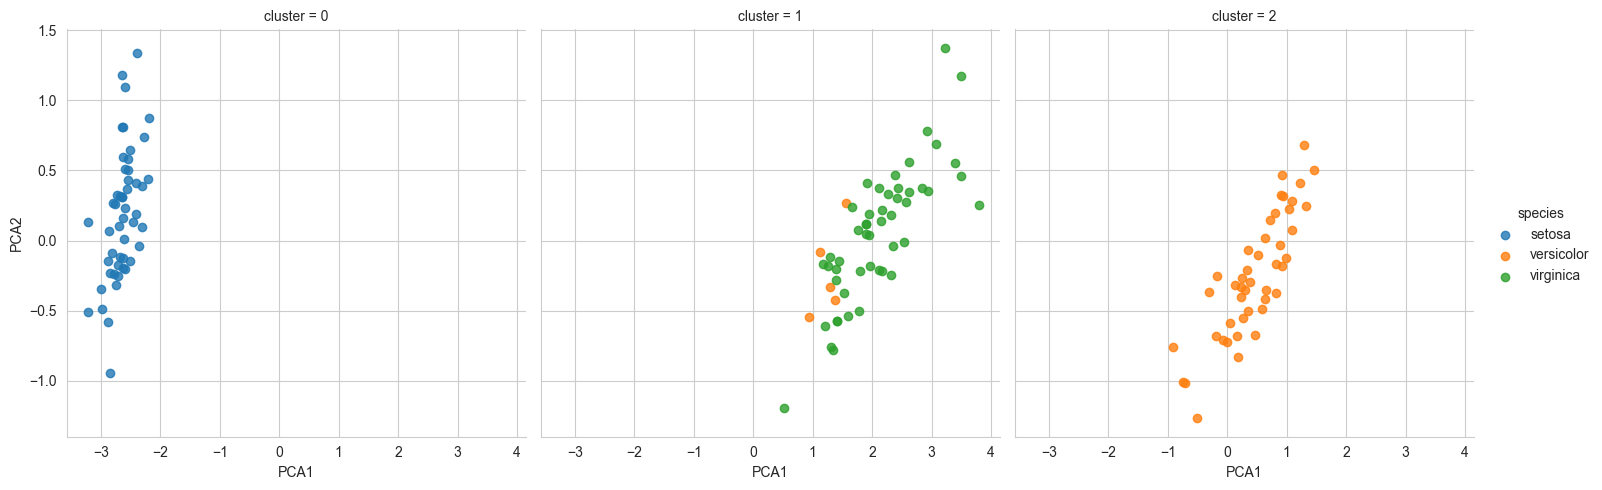

In [26]:
iris['cluster']=y_predict
sns.lmplot(
    data=iris,
    x='PCA1',
    y='PCA2',
    col='cluster',
    hue='species',
    fit_reg=False
)

The graph above clearly shows us how well the GMM algorithm was able to cluster the data into separate clusters. It's interesting how without any knowledge about the dimensions of a flower or any biological knowhow, we were able to guess the categories of the flowers to a significant accuracy. This proves to be a very usefull tool while working with experts for analyzing the patterns within a dataset.

## Application: Exploring Handwritten Digits

To demonstrate what we've learnt so far, let's look at the character recognition problem. In the real world the problem would have involved gathering handwritten data and centering characters of an image but, in this instance we'll use a shortcut and use the Scikit-Learn's set of performatted digits, which is built into the library.

### Loading and Visualizing the data

We can use the Scikit-learn's data access interface to take a look at this data

In [27]:
from sklearn.datasets import load_digits
digits=load_digits()
len(digits['target'])

1797

In [28]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

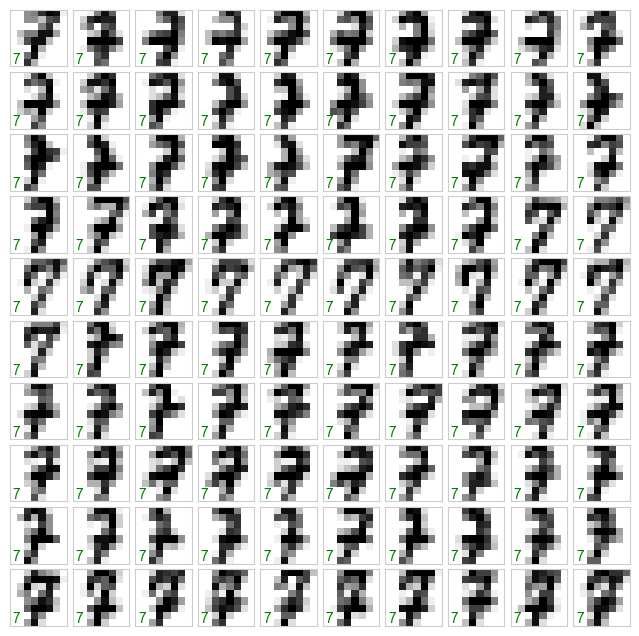

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

seven_digits={
    'target':[target for target in digits['target'] if target==7],
    'images':[digits['images'][seven] for seven in range(1797) if digits['target'][seven]==7]
}

for i, ax in enumerate(axes.flat):
    if seven_digits['target'][i]==7:
        ax.imshow(seven_digits['images'][i], cmap='binary', interpolation='nearest')
        ax.text(0.05, 0.05, str(seven_digits['target'][i]),
                transform=ax.transAxes, color='green')

As we saw before the data that we feed to train the algorithm must be of the form `[n_samples,n_features]`. This can be found under the key 'data' of the digits dictionary like object.

In [30]:
X=digits['data']
digits['data'].shape

(1797, 64)

And the Target class of each of these 1797 8*8 images have been stored under the 'target' key in the digits dictionary.

In [31]:
Y=digits['target']
digits['target'].shape

(1797,)

### Reducing the Dimension

Let's vizualise the 64 dimensions of this data. Exactly, it'll be hard to do so since we can not see beyond 3D and vizualizing beyond 2d is just impossible.

Because of this, we'll perform a dimensionality reduction operation onto the dataset to compress the jist of the data into two dimensions and then visualize them onto a plane.

For this instance we'll use a manifold learning algorithm called Isomap, and transform the data into two dimensions.

In [32]:
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(digits['data'])
data_projected=iso.transform(digits['data'])
data_projected.shape

c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

The data has now been squeezed into two dimensions. Let's try to plot these points now.

In [33]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

C:\Users\denis\AppData\Local\Temp\ipykernel_22032\1541040311.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('tab10', 10)


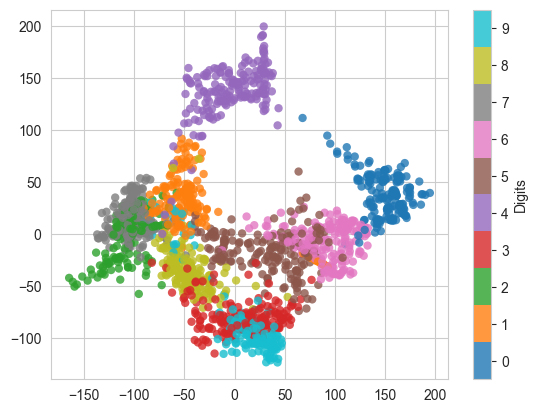

In [83]:
plt.scatter(
    data_projected[:, 0],
    data_projected[:, 1],
    c=digits['target'],
    edgecolor='none',
    alpha=.8,
    cmap=plt.cm.get_cmap('tab10', 10)
)

plt.colorbar(label='Digits',ticks=range(10))
plt.clim(-0.5,9.5)

This give us a slight intuition on how well different integers are separated in the 64 dimensional space. You can see how 0 and 1 are wide appart since they both have different ways of being written. 1 and 7 are quite close because of their identical stem-like shape.

Overall this tells us that the digits are quite well separated, which means that even a fairly straight-forward algorithm can learn the difference between these digits.

### Classification of digits
Let's now apply a classification algorithm on this dataset. As we did with the iris dataset, we'll first split the dataset into train and test sets and then apply the Gaussian Naive Bayes model

In [152]:
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train=train_test_split(digits['data'],digits['target'],random_state=0)
X_test.shape,X_train.shape,Y_test.shape,Y_train.shape

((1347, 64), (450, 64), (1347,), (450,))

In [153]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [155]:
Y_Pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_Pred)

0.8596881959910914

Even the simplest of the models generates 84% accuracy. However this single parameter is not enough to tell us about the performance of the model. Let's have a look at the confusion matrix of the above model.

Text(77.92222222222227, 0.5, 'true value')

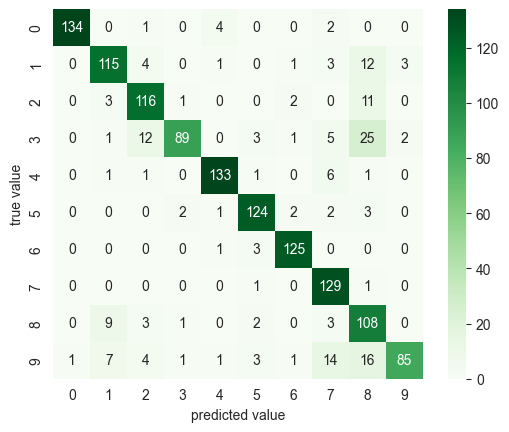

In [156]:
from sklearn.metrics import confusion_matrix
CMatrix=confusion_matrix(Y_test,Y_Pred)
sns.heatmap(
    CMatrix,
    square=True,
    annot=True,
    cbar=True,  
    cmap=plt.cm.Greens,
    fmt='g'
)
plt.xlabel('predicted value')
plt.ylabel('true value')

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights. Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We'll use green for correct labels, and red for incorrect labels:

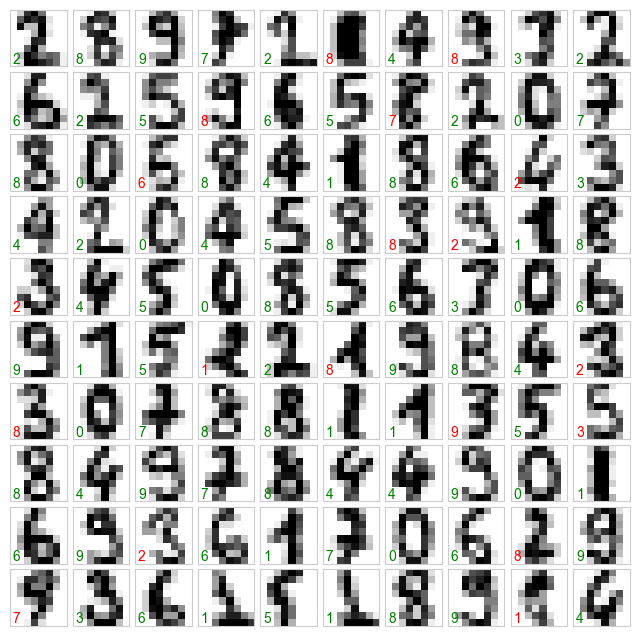

In [159]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = X_test.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(Y_Pred[i]),
            transform=ax.transAxes,
            color='green' if (Y_test[i] == Y_Pred[i]) else 'red')


Looking at this chart we can access the drawbacks of our model and fix them using models like support vector machines, random forests or other classification approaches.

## Summary

In this section, we covered the essential features of the Scikit-Learn data representation, and the estimator API. Regardless of the type of estimator, the same import/instatniate/fit/predict pattern holds. Armed with this information about the estimator API, You can explore the Scikit-Learn documentation and begin trying out various models on yoru data.